<a href="https://colab.research.google.com/github/Sumiartin/kmeans-clustering/blob/main/Klastering_Kepadatan_Penduduk_dengan_Metode_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

2. Load Dataset

In [9]:
df = pd.read_csv('Data Penduduk Kab Kolaka.csv')

3. Persiapkan Data untuk Klasterisasi

In [10]:
X = df[['Luas Wilayah','Jumlah']].values
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

4. Tentukan Jumlah Klaster Optimal

In [11]:
cs = []
silhouette_scores = []
dbi_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(x)

    silhouette_avg = silhouette_score(x, labels)
    silhouette_scores.append(silhouette_avg)

    dbi_score = davies_bouldin_score(x, labels)
    dbi_scores.append(dbi_score)

    cs.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

5. Visualisasikan Metode Siku (Elbow) dan Silhouette Score

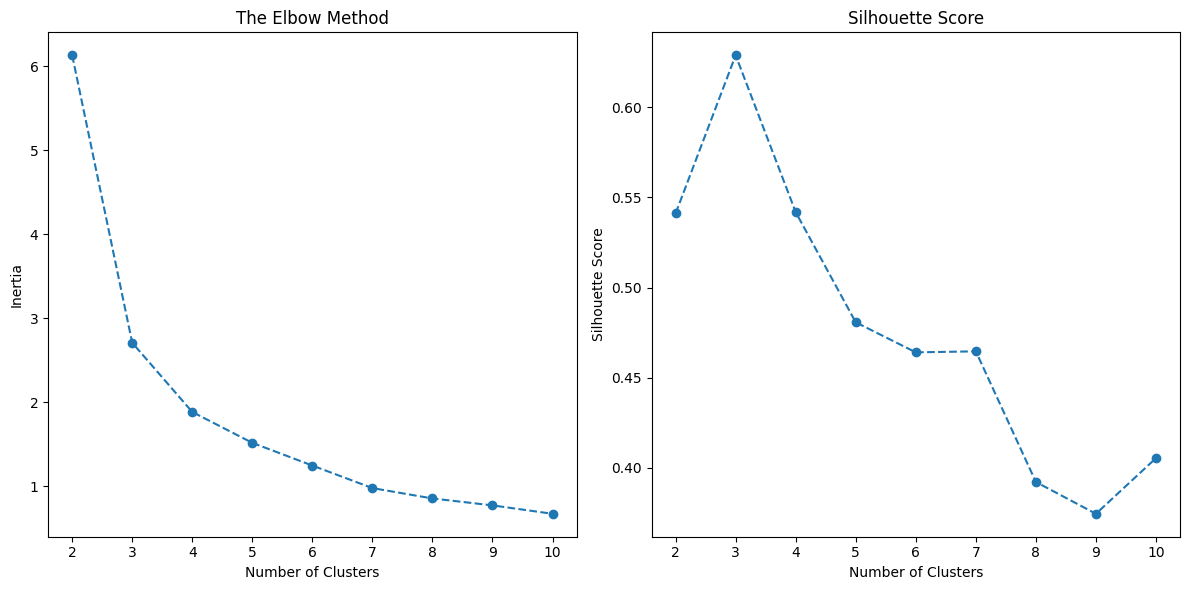

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), cs, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

6. Terapkan Klasterisasi K-Means dengan Jumlah Optimal Klaster

In [13]:
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because we start from 2 clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

7. Berikan Label pada Klaster

In [36]:
cluster_labels = {0: 'Padat', 1: 'Sangat Padat', 2: 'Sedang'}
df['Cluster'] = kmeans.labels_
df['Cluster'] = df['Cluster'].map(cluster_labels)

In [37]:
df

,Desa/Kelurahan,Jumlah,Luas Wilayah,Cluster
0,Longori,2061,1.75,Padat
1,Puundoho,1529,7.89,Padat
2,Puulemo,1418,48.66,Sedang
3,Baula,2058,29.03,Padat
4,Puubenua,673,4.06,Padat
...,...,...,...,...
130,Palewai,1409,7.17,Padat
131,Oneeha,963,5.52,Padat
132,Puundaipa,343,4.76,Padat
133,Lamoiko,399,40.73,Padat


8. Tampilkan Informasi Klaster

In [38]:
unique_clusters, counts = np.unique(kmeans.labels_, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} data")

Cluster 0: 103 data
Cluster 1: 13 data
Cluster 2: 19 data


9. Visualisasi klaster kepadatan penduduk

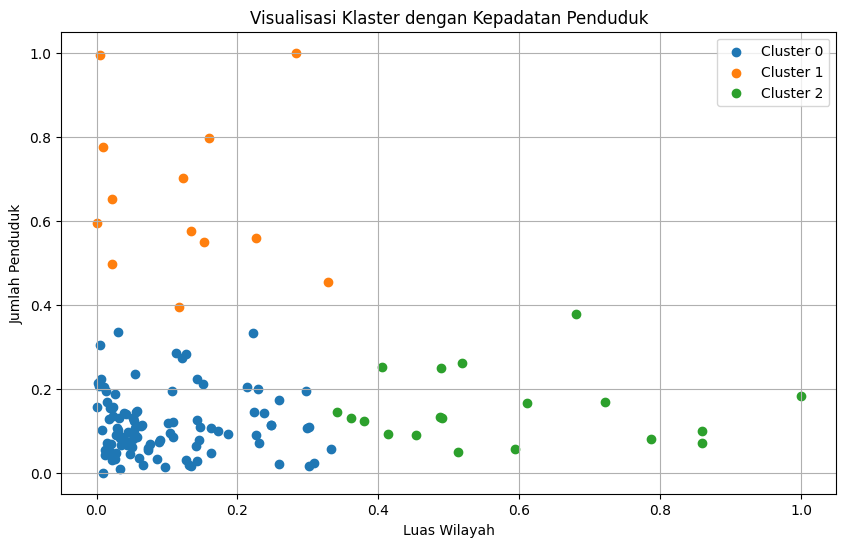

In [39]:
plt.figure(figsize=(10, 6))

# Plot klaster dengan membedakan kepadatan
for cluster in range(len(np.unique(kmeans.labels_))):
    plt.scatter(x[kmeans.labels_ == cluster, 0],
                x[kmeans.labels_ == cluster, 1],
                label=f'Cluster {cluster}')

plt.xlabel("Luas Wilayah")
plt.ylabel("Jumlah Penduduk")
plt.title("Visualisasi Klaster dengan Kepadatan Penduduk")
plt.legend()
plt.grid(True)
plt.show()